Ahora haremos el mismo ejemplo pero con librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# 1. Cargar el dataset
file_path = "dataset_phishing.csv" 
df = pd.read_csv(file_path)

seleccionamos variables predictores y objetivo:

In [2]:
X = df[['length_url', 'nb_dots']].values  # Dos variables predictoras
y = (df['status'] == 'phishing').astype(int).values  # 1 para phishing, 0 para legitimate

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [6]:
y_pred = model.predict(X_test)


In [7]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

F1-score: 0.5851364063969896

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      1143
           1       0.63      0.54      0.59      1143

    accuracy                           0.61      2286
   macro avg       0.62      0.61      0.61      2286
weighted avg       0.62      0.61      0.61      2286



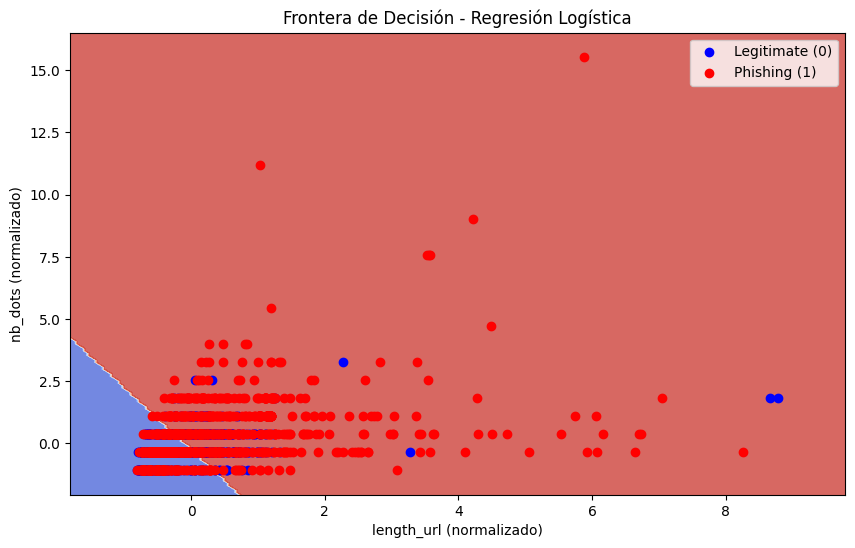

In [8]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predicciones en el grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='Legitimate (0)')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='Phishing (1)')
plt.title('Frontera de Decisión - Regresión Logística')
plt.xlabel('length_url (normalizado)')
plt.ylabel('nb_dots (normalizado)')
plt.legend()
plt.show()